In [150]:
# Logistic Regression on Customer Travel Data

# importinf the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#reading the dataset
df = pd.read_csv('Customertravel.csv')
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


Understanding the statistical information

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [152]:
df.shape  #dimensions of the dataset

(954, 7)

In [153]:
# observing the distribution of the response variable
df['AnnualIncomeClass'].value_counts()

Middle Income    409
Low Income       386
High Income      159
Name: AnnualIncomeClass, dtype: int64

In [154]:
# observing distribution in percent format
round(df['AnnualIncomeClass'].value_counts(normalize = True)*100 , 2)

Middle Income    42.87
Low Income       40.46
High Income      16.67
Name: AnnualIncomeClass, dtype: float64

<Axes: xlabel='AnnualIncomeClass', ylabel='count'>

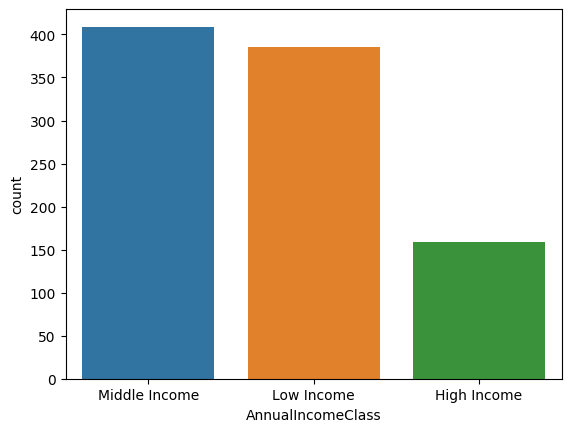

In [155]:
# observation using a count plot
sns.countplot(x = 'AnnualIncomeClass',data = df)

<Axes: xlabel='Age', ylabel='count'>

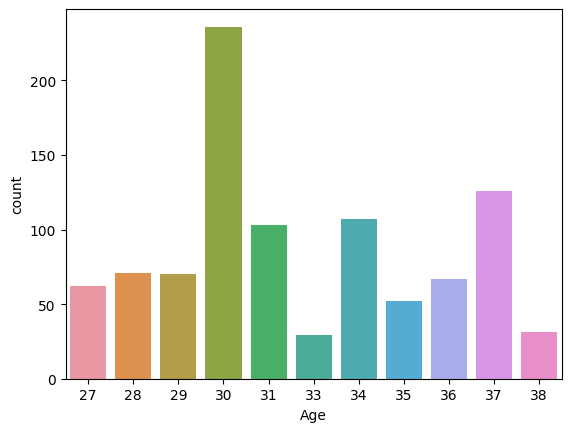

In [156]:
sns.countplot(x = 'Age',data = df)

<Axes: xlabel='ServicesOpted', ylabel='count'>

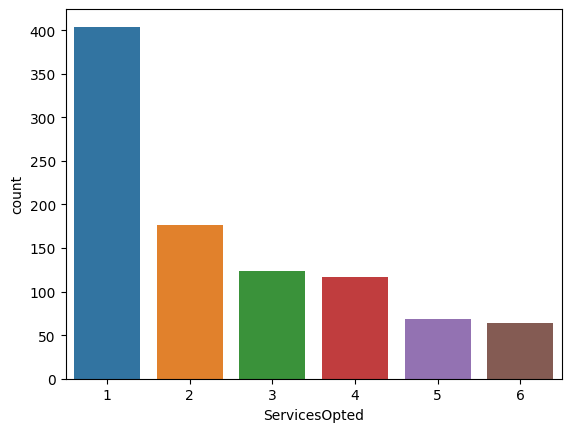

In [157]:
sns.countplot(x = 'ServicesOpted',data = df)

<Axes: xlabel='BookedHotelOrNot', ylabel='count'>

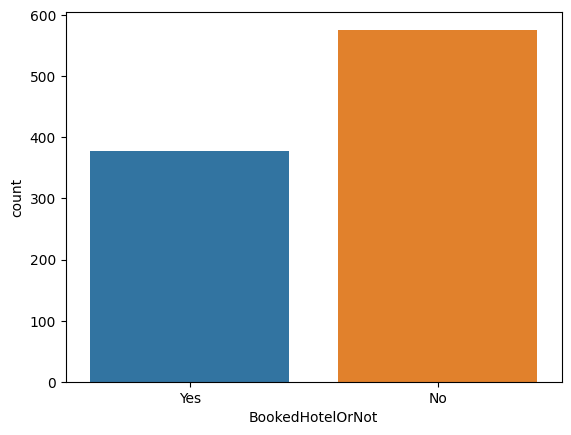

In [158]:
sns.countplot(x = 'BookedHotelOrNot',data = df)

<Axes: xlabel='Age', ylabel='ServicesOpted'>

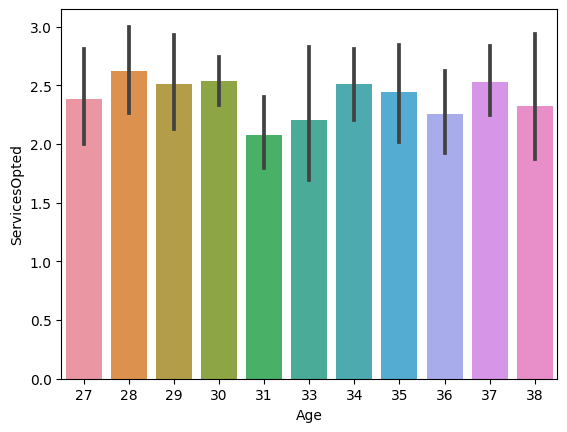

In [159]:
# observing with bar plot       # bar plot only takes numeric data
sns.barplot(x='Age' , y='ServicesOpted' , data = df)

<ipython-input-160-a691f9ce8329>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ServicesOpted']);


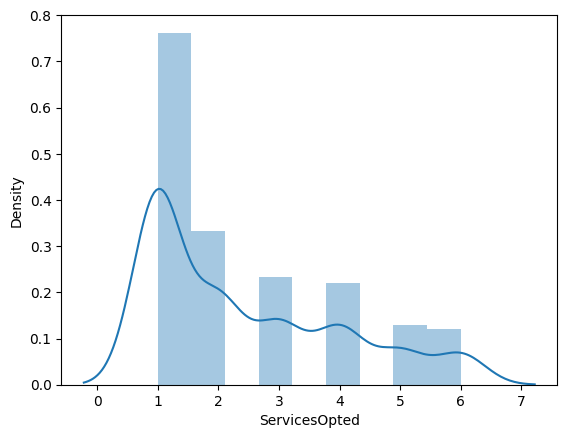

In [160]:
sns.distplot(df['ServicesOpted']);

<ipython-input-161-3cd339c99e47>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age']);


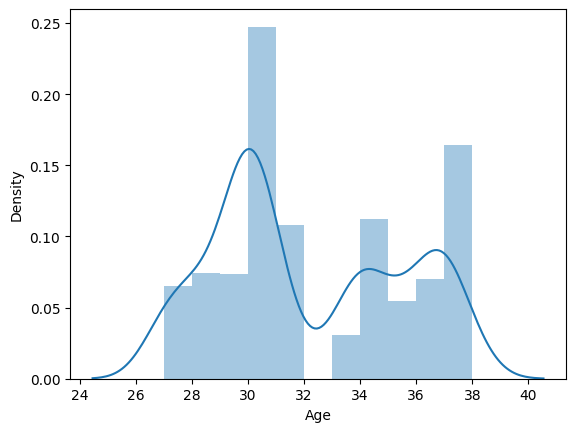

In [161]:
sns.distplot(df['Age']);

In [162]:
df.isna()  # searching for any missing values

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
949,False,False,False,False,False,False,False
950,False,False,False,False,False,False,False
951,False,False,False,False,False,False,False
952,False,False,False,False,False,False,False


understanding the correlation between features

In [176]:
#correlation_metrics = df.corr()
#fig = plt.figure(figsize = (10,8))
#sns.heatmap(correlation_metrics , square = True)
#plt.show()

<ipython-input-171-81232a470a49>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_metrics = df.corr()


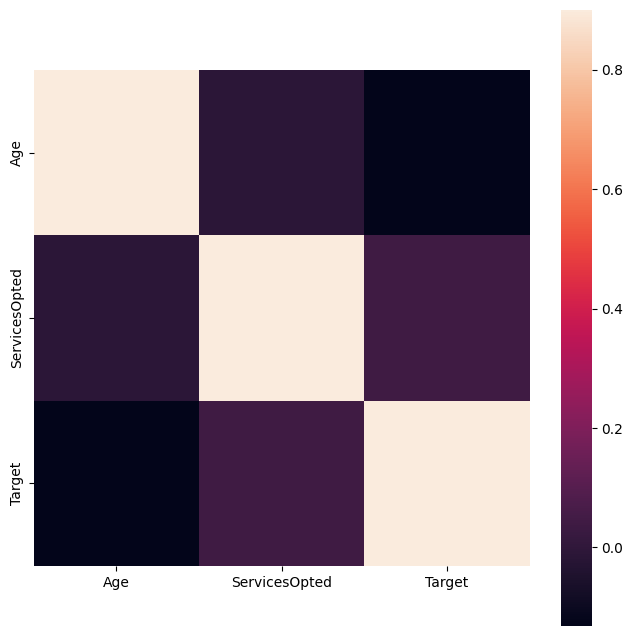

In [171]:
from sklearn.metrics import confusion_matrix   #confusion matrix only displays info of numeric data
correlation_metrics = df.corr()
fig = plt.figure(figsize = (8,8))
sns.heatmap(correlation_metrics , vmax = 0.9 , square = True)
plt.show()

<ipython-input-173-259c6b8bca2f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_metrics = df.corr()


                    Age  ServicesOpted    Target
Age            1.000000      -0.012422 -0.131534
ServicesOpted -0.012422       1.000000  0.038646
Target        -0.131534       0.038646  1.000000


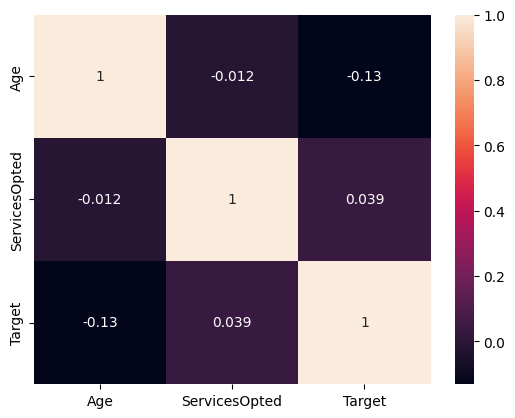

In [173]:
#corr_matrix = df.corr()
correlation_metrics = df.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True)
plt.show()

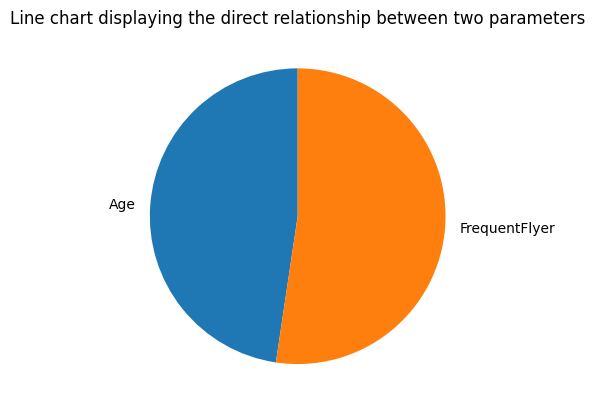

In [174]:
y = np.array([91, 100])
mylabels = ['Age', 'FrequentFlyer']

#myexplode = [0.2, 0]

plt.pie( y ,  labels = mylabels ,  startangle = 90 ) # , explode = myexplode , shadow = True)
#fig = plt.figure(figsize =(10, 7))
plt.title("Line chart displaying the direct relationship between two parameters")
# show plot
plt.show()

[Text(0.5, 1.0, 'boxplot')]

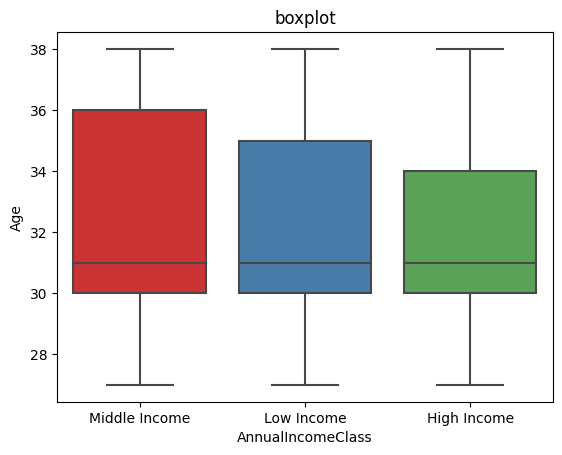

In [175]:
sns.boxplot(y='Age',x ='AnnualIncomeClass', data = df, palette = 'Set1').set(title='boxplot')

[Text(0.5, 1.0, 'boxplot')]

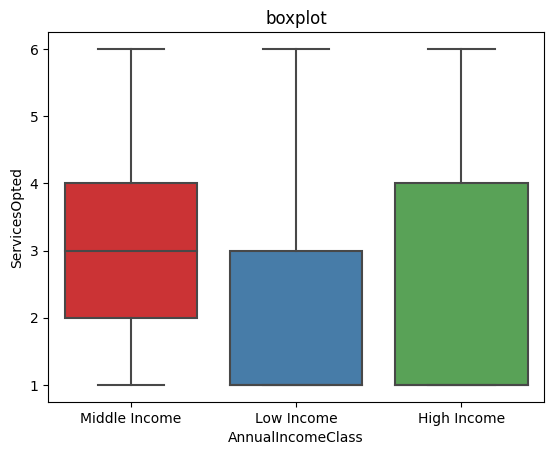

In [80]:
sns.boxplot(y='ServicesOpted',x ='AnnualIncomeClass', data = df, palette = 'Set1').set(title='boxplot')

In [81]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns,set()

(<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>,
 set())

In [82]:
df['AnnualIncomeClass'].value_counts(dropna=False)


Middle Income    409
Low Income       386
High Income      159
Name: AnnualIncomeClass, dtype: int64

In [83]:
df['FrequentFlyer'].value_counts(dropna=False)

No           608
Yes          286
No Record     60
Name: FrequentFlyer, dtype: int64

In [84]:
df['BookedHotelOrNot'].value_counts(dropna=False)

No     576
Yes    378
Name: BookedHotelOrNot, dtype: int64

In [85]:
df['AccountSyncedToSocialMedia'].value_counts(dropna=False)

No     594
Yes    360
Name: AccountSyncedToSocialMedia, dtype: int64

Converting categorical data into numeric values

In [149]:
df['FrequentFlyer'] = df['FrequentFlyer'].replace({'Yes':2,'No':1, 'No Record':0})
df
df['AccountSyncedToSocialMedia'] = df['AccountSyncedToSocialMedia'].replace({'Yes':1,'No':0})
df
df['BookedHotelOrNot'] = df['BookedHotelOrNot'].replace({'Yes':1,'No':0})
df
df['AnnualIncomeClass'] = df['AnnualIncomeClass'].replace({'Low Income':0,'Middle Income':1, 'High Income':2})
df

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,1,6,0,1,0
1,34,1,0,5,1,0,1
2,37,0,1,3,1,0,0
3,30,0,1,2,0,0,0
4,30,0,0,1,0,0,0
...,...,...,...,...,...,...,...
949,31,1,0,1,0,0,0
950,30,0,1,5,0,1,0
951,37,0,1,4,0,0,0
952,30,0,0,1,1,1,0


Training the model

In [94]:
#importing the libraries for training the model
from sklearn.model_selection import train_test_split

#from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

from sklearn.metrics import classification_report , accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns


In [129]:
x = df.drop(['AnnualIncomeClass'] , axis = 1)
y = df['AnnualIncomeClass']
# splitting for 30 % test and 70% training
xtrain , xtest , ytrain , ytest = train_test_split(x,y, test_size = 0.30 , random_state =42)
xtest.shape
logisticreg = LogisticRegression()
logisticreg.fit(xtrain , ytrain)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Scaling for better accuracy during training

In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xtrain)
sc = StandardScaler()
X_train = sc.fit_transform(xtrain)
X_test = sc.transform(xtest)

Predicting the test dataset

In [131]:
y_pred = logisticreg.predict(xtest)
logisticsreg = LogisticRegression()
y_pred


array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 0, 1, 1, 2,
       2, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 1, 1, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 2, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1,
       0, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       2, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 2,
       2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 2, 1, 0,
       1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 2, 0, 0, 1, 2, 1, 0,
       1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 0, 1, 0,
       1])

Evaluation through Classification metrics


In [132]:
accuracy = logisticreg.score(xtest , ytest)
cm = metrics.confusion_matrix(ytest , y_pred)
print(cm)

[[56 51 17]
 [22 92  0]
 [11  0 38]]


Accuracy

In [133]:
print('accuracy score of the logistic regression model for AnuualIncomeClass is :', accuracy*100,'%')

accuracy score of the logistic regression model for AnuualIncomeClass is : 64.80836236933798 %


In [134]:
x = df.drop(['FrequentFlyer'] , axis = 1)
y = df['FrequentFlyer']
xtrain , xtest , ytrain , ytest = train_test_split(x,y, test_size = 0.2 , random_state =42)
xtest.shape
logisticreg = LogisticRegression()
logisticreg.fit(xtrain , ytrain)


LogisticRegression()

In [135]:
y_pred = logisticreg.predict(xtest)
logisticsreg = LogisticRegression()
y_pred


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [136]:
accuracy = logisticreg.score(xtest , ytest)
cm = metrics.confusion_matrix(ytest , y_pred)
print(cm)

[[130   6]
 [ 27  28]]


In [137]:
print('accuracy score of the logistic regression model for AnuualIncomeClass is :', accuracy*100,'%')

accuracy score of the logistic regression model for AnuualIncomeClass is : 82.72251308900523 %


Accuracy of model

In [138]:
logreg=accuracy_score(ytest,y_pred)
logreg

0.8272251308900523

ROC AUC score

In [139]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
roc_auc_score(ytest, y_pred)

0.7324866310160428

Text(0, 0.5, 'True Positive Rate')

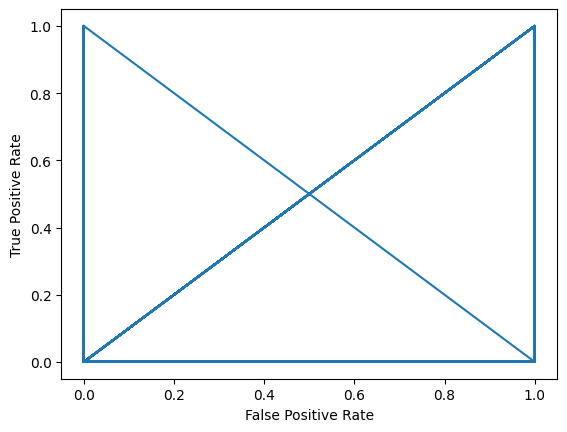

In [148]:
plt.plot(ytest, y_pred)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Classification report

In [140]:
print(metrics.classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       136
           1       0.82      0.51      0.63        55

    accuracy                           0.83       191
   macro avg       0.83      0.73      0.76       191
weighted avg       0.83      0.83      0.81       191



ADVANTAGES of Logistic regression

Overfitting is verry less

Training time is less